In [3]:
import os

OPENSLIDE_PATH = r'C:\Users\achav\Documents\Osteoartritis\openslide-win64\bin'

if hasattr(os, 'add_dll_directory'):
    # Windows
    with os.add_dll_directory(OPENSLIDE_PATH):
        import openslide
        print('Using OpenSlide from', openslide.__file__)
else:
    import openslide

Using OpenSlide from c:\Users\achav\Documents\Osteoartritis\osteo\Lib\site-packages\openslide\__init__.py


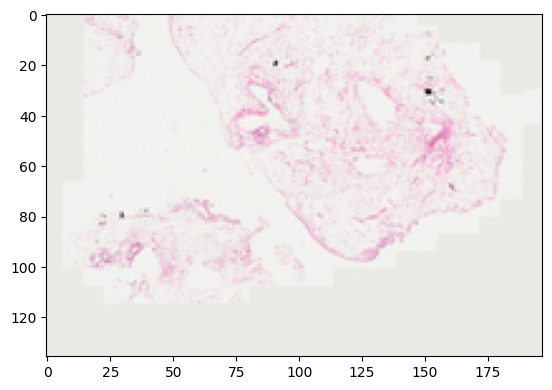

In [5]:
import openslide
import numpy as np
import matplotlib.pyplot as plt

plate_name = "Ms-10-22_001.svs"
path = f"assets/{plate_name}"

# Check if file exists
if not os.path.isfile(path):
    print(f"File {path} not found")

slide = openslide.OpenSlide(path)

# Get a thumbnail of the whole slide
thumbnail = slide.get_thumbnail((slide.dimensions[0] // 256, slide.dimensions[1] // 256))

# Convert the thumbnail to a numpy array
thumbnail = np.array(thumbnail)

# Display the thumbnail
plt.imshow(thumbnail)



### Leer las anotaciones de Milena


In [6]:
import xml.etree.ElementTree as ET

ruta_anotaciones_xml = f"assets/MS-10-22-1.xml"

tree = ET.parse(ruta_anotaciones_xml)
root = tree.getroot()

# Obtener las coordenadas de las anotaciones
coordenadas_anotaciones = []
for annotation in root.findall(".//Annotation"):
    for region in annotation.findall(".//Region"):
        coordenadas_region = []
        for vertex in region.findall(".//Vertex"):
            x = int(vertex.attrib['X'])
            y = int(vertex.attrib['Y'])
            coordenadas_region.append((x, y))
        coordenadas_anotaciones.append(coordenadas_region)
        
print(len(coordenadas_anotaciones))
for coordenadas_region in coordenadas_anotaciones:
    print(coordenadas_region)

## Delete last three elements
del coordenadas_anotaciones[-3:]
        
print(len(coordenadas_anotaciones))
for coordenadas_region in coordenadas_anotaciones:
    print(coordenadas_region)

10
[(17324, 19692), (17324, 19678), (17324, 19664), (17310, 19664), (17296, 19651), (17296, 19637), (17282, 19637), (17282, 19623), (17269, 19609), (17255, 19595), (17255, 19581), (17241, 19567), (17241, 19554), (17227, 19540), (17213, 19526), (17199, 19512), (17199, 19498), (17186, 19484), (17172, 19484), (17158, 19457), (17144, 19429), (17130, 19415), (17116, 19401), (17075, 19374), (17061, 19346), (17047, 19332), (17019, 19318), (17006, 19291), (16992, 19291), (16992, 19277), (16978, 19263), (16950, 19249), (16936, 19235), (16922, 19221), (16909, 19207), (16895, 19194), (16895, 19180), (16881, 19180), (16853, 19152), (16839, 19138), (16825, 19124), (16825, 19111), (16798, 19083), (16784, 19083), (16770, 19069), (16756, 19055), (16742, 19041), (16729, 19027), (16701, 19014), (16701, 19000), (16673, 18986), (16673, 18972), (16659, 18972), (16645, 18958), (16632, 18944), (16618, 18930), (16604, 18917), (16590, 18917), (16590, 18903), (16576, 18889), (16562, 18875), (16549, 18875), (165

In [7]:
# Transform slide to numpy array
import cv2

level = 2
image = np.array(slide.read_region((0, 0), level, slide.level_dimensions[level]))

print(slide.level_dimensions[0])
print(slide.level_dimensions[level])

print(image.shape)

# levels info
print(slide.level_count)
print(slide.level_dimensions)
print(slide.level_downsamples)

downsample_factor = 16

# Transform annotations to level 2 (downsampled by 16)
coordenadas_anotaciones_nivel_2 = []
for coordenadas_region in coordenadas_anotaciones:
    coordenadas_region_nivel_2 = []
    for x, y in coordenadas_region:
        x_nivel_2 = x // downsample_factor
        y_nivel_2 = y // downsample_factor
        coordenadas_region_nivel_2.append((x_nivel_2, y_nivel_2))
    coordenadas_anotaciones_nivel_2.append(coordenadas_region_nivel_2)

print(coordenadas_anotaciones)


(50470, 34910)
(3154, 2181)
(2181, 3154, 4)
3
((50470, 34910), (12617, 8727), (3154, 2181))
(1.0, 4.000193845057948, 16.00416071002318)
[[(17324, 19692), (17324, 19678), (17324, 19664), (17310, 19664), (17296, 19651), (17296, 19637), (17282, 19637), (17282, 19623), (17269, 19609), (17255, 19595), (17255, 19581), (17241, 19567), (17241, 19554), (17227, 19540), (17213, 19526), (17199, 19512), (17199, 19498), (17186, 19484), (17172, 19484), (17158, 19457), (17144, 19429), (17130, 19415), (17116, 19401), (17075, 19374), (17061, 19346), (17047, 19332), (17019, 19318), (17006, 19291), (16992, 19291), (16992, 19277), (16978, 19263), (16950, 19249), (16936, 19235), (16922, 19221), (16909, 19207), (16895, 19194), (16895, 19180), (16881, 19180), (16853, 19152), (16839, 19138), (16825, 19124), (16825, 19111), (16798, 19083), (16784, 19083), (16770, 19069), (16756, 19055), (16742, 19041), (16729, 19027), (16701, 19014), (16701, 19000), (16673, 18986), (16673, 18972), (16659, 18972), (16645, 18958)

In [8]:
# Draw the annotations on the slide
for coordenadas_region in coordenadas_anotaciones_nivel_2:
    print(coordenadas_region)
    for i in range(len(coordenadas_region)):
        point = coordenadas_region[i]
        next_point = coordenadas_region[(i + 1) % len(coordenadas_region)]
        # color black
        color = (0, 0, 0)
        cv2.line(image, point, next_point, color, 10)

# Draw a solid rectangle around the annotations and a number to identify them
for coordenadas_region in coordenadas_anotaciones_nivel_2:
    x_min = min(x for x, y in coordenadas_region)
    x_max = max(x for x, y in coordenadas_region)
    y_min = min(y for x, y in coordenadas_region)
    y_max = max(y for x, y in coordenadas_region)
    # color red
    color = (255, 0, 0)
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 10)
    # color black
    color = (0, 0, 0)
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 10
    thickness = 2

    # Draw the number of the annotation in the center of the rectangle
    x_center = (x_min + x_max) // 2
    y_center = (y_min + y_max) // 2
    cv2.putText(image, str(coordenadas_anotaciones_nivel_2.index(coordenadas_region)), (x_center, y_center), font, fontScale, color, thickness, cv2.LINE_AA)
    


[(1082, 1230), (1082, 1229), (1082, 1229), (1081, 1229), (1081, 1228), (1081, 1227), (1080, 1227), (1080, 1226), (1079, 1225), (1078, 1224), (1078, 1223), (1077, 1222), (1077, 1222), (1076, 1221), (1075, 1220), (1074, 1219), (1074, 1218), (1074, 1217), (1073, 1217), (1072, 1216), (1071, 1214), (1070, 1213), (1069, 1212), (1067, 1210), (1066, 1209), (1065, 1208), (1063, 1207), (1062, 1205), (1062, 1205), (1062, 1204), (1061, 1203), (1059, 1203), (1058, 1202), (1057, 1201), (1056, 1200), (1055, 1199), (1055, 1198), (1055, 1198), (1053, 1197), (1052, 1196), (1051, 1195), (1051, 1194), (1049, 1192), (1049, 1192), (1048, 1191), (1047, 1190), (1046, 1190), (1045, 1189), (1043, 1188), (1043, 1187), (1042, 1186), (1042, 1185), (1041, 1185), (1040, 1184), (1039, 1184), (1038, 1183), (1037, 1182), (1036, 1182), (1036, 1181), (1036, 1180), (1035, 1179), (1034, 1179), (1034, 1178), (1033, 1177), (1032, 1177), (1031, 1176), (1030, 1175), (1029, 1175), (1029, 1175), (1029, 1174), (1028, 1173), (1027

(2181, 3154, 4)


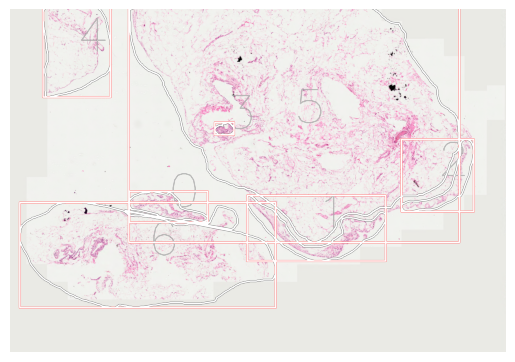

In [9]:
print(image.shape)

# Display the slide with the annotations
plt.imshow(image)

plt.axis('off')  # Hide axis
plt.show()

In [10]:
# I will need a CNN to detect whether the a region belongs to a class A or B, and then I will need to segment the region to detect the exact area of the region that belongs to the class A or B.

# First, let's create a dataset of images from the slide depending on the annotations

# Create a dataset of images from the slide depending on the annotations
import os
import cv2

# Create a directory to store the images
dataset_dir = "dataset"
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

# Create a directory to store the images of class A
class_A_dir = os.path.join(dataset_dir, "class_A")
if not os.path.exists(class_A_dir):
    os.makedirs(class_A_dir)

# Create a directory to store the images of class B
class_B_dir = os.path.join(dataset_dir, "class_B")
if not os.path.exists(class_B_dir):
    os.makedirs(class_B_dir)

# Create a directory to store the images of class None
class_None_dir = os.path.join(dataset_dir, "class_None")
if not os.path.exists(class_None_dir):
    os.makedirs(class_None_dir)

# Create a directory to store the images of the annotations
annotations_dir = os.path.join(dataset_dir, "annotations")
if not os.path.exists(annotations_dir):
    os.makedirs(annotations_dir)


In [ ]:
## Convert the annotations to a mask
level = 0
mask = np.zeros((slide.level_dimensions[level][1], slide.level_dimensions[level][0]), dtype=np.uint8)

for coordenadas_region in coordenadas_anotaciones:
    coordenadas_region = np.array(coordenadas_region)
    cv2.fillPoly(mask, [coordenadas_region], 255)

# Save the mask

mask_path = os.path.join(annotations_dir, f"{plate_name}_mask_level_{level}.png")
cv2.imwrite(mask_path, mask)

mask.shape

: 

In [ ]:
# For each annotation, create a dataset of images

# Get the size of the images
size = 1024

# This region is class A
coordenadas_region = coordenadas_anotaciones[5]

# Find the bounding box of the annotations
x_min = min(x for x, y in coordenadas_region)
x_max = max(x for x, y in coordenadas_region)
y_min = min(y for x, y in coordenadas_region)
y_max = max(y for x, y in coordenadas_region)

# Iterate over the bounding box of the annotations and extract the images

for x in range(x_min, x_max, size):
    for y in range(y_min, y_max, size):
        # Extract the image
        image = np.array(slide.read_region((x, y), 0, (size, size)))

        # Check if more than 50% of the image is inside the annotations
        mask_region = mask[y:y + size, x:x + size]
        if np.count_nonzero(mask_region) > 0.5 * size * size:
            # Save the image as class A
            image_path = os.path.join(class_B_dir, f"{x}_{y}.png")
            cv2.imwrite(image_path, image)


: 

In [12]:
# Reducing the size of the images

# Get the size of the images
size = 128

# Create a new directory to store the images with the new size inside the class A directory
class_A_resized_dir = os.path.join(class_A_dir, f"size_{size}")
if not os.path.exists(class_A_resized_dir):
    os.makedirs(class_A_resized_dir)

# Create a new directory to store the images with the new size inside the class B directory
class_B_resized_dir = os.path.join(class_B_dir, f"size_{size}")
if not os.path.exists(class_B_resized_dir):
    os.makedirs(class_B_resized_dir)


# for every image in the class_A_dir, save them in a new directory with the new size
for image_name in os.listdir(class_A_dir):
    image_path = os.path.join(class_A_dir, image_name)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (size, size))
    image_path_resized = os.path.join(class_A_resized_dir, image_name)
    cv2.imwrite(image_path_resized, image)

# for every image in the class_B_dir
for image_name in os.listdir(class_B_dir):
    image_path = os.path.join(class_B_dir, image_name)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (size, size))
    image_path_resized = os.path.join(class_B_resized_dir, image_name)
    cv2.imwrite(image_path_resized, image)


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
